In [36]:
'''
__ Author __
Nazanin Mohammadrezaii

__ Topic__
Logistic regression

__ Date __
Sep 2021

'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Read the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:,2:4].values #or df.iloc[:,[2,3]]
y = df.iloc[:,4].values
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25 , random_state =0)

In [39]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [40]:
# logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [71]:
# test the model
yhat = classifier.predict(X_test)

In [72]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yhat)
cm

array([[63,  5],
       [ 8, 24]], dtype=int64)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


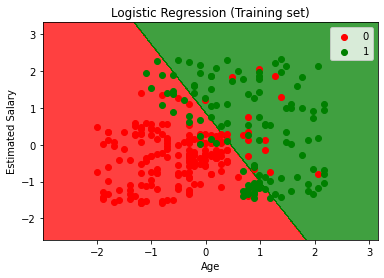

In [69]:
# visualize the model performance for the train set
from matplotlib.colors import ListedColormap
x_set , y_set = X_train,y_train
X1 , X2 = np.meshgrid( np.arange(np.min(x_set[:,0])-1,np.max(x_set[:,0])+1,step=0.01), 
                        np.arange(np.min(x_set[:,1])-1,np.max(x_set[:,1])+1,step=0.01)  )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red','green')) )
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set==j,1] , c = ListedColormap(('red', 'green'))(i),label=j )
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


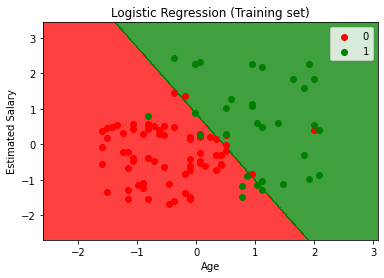

In [74]:
# visualize the model performance for the test set
from matplotlib.colors import ListedColormap
x_set , y_set = X_test,y_test
X1 , X2 = np.meshgrid( np.arange(np.min(x_set[:,0])-1,np.max(x_set[:,0])+1,step=0.01), 
                        np.arange(np.min(x_set[:,1])-1,np.max(x_set[:,1])+1,step=0.01)  )

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red','green')) )
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set==j,1] , c = ListedColormap(('red', 'green'))(i),label=j )
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()